# Coursera Capstone 
# IBM Applied Data Science Capstone

## Opening a Asian Restaurant in London, United Kingdom 
###### This post is on the “Battle of Neighborhoods” and the focus is on the Greater London Area, United Kingdom.

## Introduction 

London is now home to more than 8.6 million people, the highest the city’s population has been since 1939. What’s more, 44% of London now consists of black and ethnic minorities, compared to only 28.9% in 2001. That’s according to the Greater London Authority, which serves the London mayor’s office. London’s proportion of immigrants may seem high, but that’s not an uncommon balance for many global business capitals.
This final project explores the best locations for an Asian restaurant throughout the city of London. Potentially the owner of the new Asian restaurant can have great success and consistent profit. However, as with any business, opening a new restaurant requires serious considerations and is more complicated than it seems from the first glance. In particular. The location of the restaurant is one of the most important factors that will affect whether it will have success or a failure. So our project will attempt to answer the questions “Where should the investor open a Asian Restaurant?” and “Where should I go if I want great Asian food?”.

## Business Problem

The objective of this Capstone project is to analyse and select the best locations in the city of London to open a new Asian restaurant. Using Data Science methodology and instruments such as Data Analysis and Visualization, this project aims to provide solutions to answer the business question: Where in the city of London, should the investor open an Asian Restaurant?
Target Audience of this project and some demographic facts 
This project particularly useful to developers and investors looking to open or invest in an Asian restaurant in the city of London. Overall, London is a great place to open a restaurant with an ethnical cuisine. As London is one of the most diverse cities in the world. With its diverse culture, comes diversity in the food items. There are many restaurants in London city, each belonging to different categories like Chinese, Indian, French, etc. Why did we decide to focus on an Asian cuisine in out project? Now when the idea of a healthy lifestyle conquered the minds of people over country, Japanese restaurants became extremely popular, as they offer a healthy alternative to regular London eating habits.

## Data

To solve the problem, we will need the following data:

•	London data containing the neighbourhoods and boroughs.

•	Latitude and longitude coordinates of those neighborhoods. This is required to plot the map and get the venue data. 

•	 Venue data, particularly data related to restaurants. We are going to use this data to perform further analysis of this neighborhoods. 

This project will require using of many data science skills, from web scrapping (open source dataset), working with API (Foursquare), data cleaning, data wrangling, to map visualization (Folium). In the next Methodology section, we will discuss and describe any exploratory data analysis that we did, any inferential statistical testing that we performed, and what machine learning techniques were used. 

## Methodology

•	Data will be collected from https://en.wikipedia.org/wiki/List_of_areas_of_London and https://en.wikipedia.org/wiki/Demography_of_London, cleaned and processed into a dataframe. 

•	Foursquare will be used to locate all venues.

•	London is big and due to the limitations in the number of calls for the Foursquare API some assumptions are made with corresponding data wrangling and cleansing.

•	Finally, the data will be visually assessed using graphing from Python libraries. Also to analyze which neighborhood of London is good to open an Asian restaurant, we will use a K-means clustering: a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.

In [2]:
!pip install wikipedia
!pip install folium
!pip install geopy
!pip install geopandas
!pip install geojson
!conda install -c districtdatalabs yellowbrick

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11685 sha256=88835d3e665f7e088a8b9f134efb902bccb5fcf58fb7f862fb169f0f9b563528
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia
     |████████████████████████████████| 94 kB 6.0 MB/s  eta 0:00:01
     |████████████████████████████████| 962 kB 14.4 MB/s eta 0:00:01
     |████████████████████████████████| 14.8 MB 17.0 MB/s eta 0:00:01
     |████████████████████████████████| 6.4 MB 24.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 50.7 MB/s eta 0:00:01
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - yellowbrick


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pytest-runner-5.2          |     pyhd3eb1b0_0           9 KB

In [3]:
import pandas as pd
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import wikipedia as wp
import requests
from bs4 import BeautifulSoup
import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geopandas as gpd

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import folium # map rendering library
from folium import plugins
from folium.plugins import HeatMap

# import time
import time

# install the Geocoder
!pip -q install geocoder
import geocoder

from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


Dataset 1

In this project, London will be used as synonymous to the “Greater London Area”. Within the Greater London Area, there are areas that are within the London Area Postcode. The focus of this project will be the neighborhoods are that are within the London Post Code area.
The London Area consists of 32 Boroughs and the “City of London”. Our data will be from the link — Greater London Area <https://en.wikipedia.org/wiki/List_of_areas_of_London >
The web scrapped of the Wikipedia page for the Greater London Area data is provided below:
The BeautifulSoup package is used to scrap the needed data from Wikipedia.
Then the html is cleaned and parsed accordingly.

In [4]:
wikiurl="https://en.wikipedia.org/wiki/List_of_areas_of_London"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


In [5]:
# Cleans html file
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.find('table',{'class':"wikitable"})

In [6]:
df=pd.read_html(str(indiatable))
# convert list to dataframe
df=pd.DataFrame(df[0])

In [7]:
df.shape

(531, 6)

The result of the df.head() is shown below:

In [8]:
df.head()

,Location,London borough,Post town,Postcode district,Dial code,OS grid ref
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon[8],CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


The resulting dataframe needs to be cleaned as follows:

In [9]:
# Remove Borough reference numbers with []
df['London\xa0borough'] = df['London\xa0borough'].map(lambda x: x.rstrip(']').rstrip('0123456789').rstrip('['))

In [10]:
df.head()

,Location,London borough,Post town,Postcode district,Dial code,OS grid ref
0,Abbey Wood,"Bexley, Greenwich",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon,CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon,CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


London is big and due to the limitations in the number of calls for the Foursquare API, the following assumptions are made with corresponding data wrangling and cleansing:

Assumption 1: Where the Postcode are more than one, the postcodes are spread to multi-rows and assigned the same values from the other columns.

In [11]:
df0 = df.drop('Postcode\xa0district', axis=1).join(df['Postcode\xa0district'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('Postcode\xa0district'))

In [12]:
df0.head()

,Location,London borough,Post town,Dial code,OS grid ref,Postcode district
0,Abbey Wood,"Bexley, Greenwich",LONDON,020,TQ465785,SE2
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,020,TQ205805,W3
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,020,TQ205805,W4
2,Addington,Croydon,CROYDON,020,TQ375645,CR0
3,Addiscombe,Croydon,CROYDON,020,TQ345665,CR0


Assumption 2: From the data, only the 'Location', 'London borough', 'Postcode district', 'Post town' will be used for this project. So they are extracted into a new dataframe.

In [13]:
df1 = df0[['Location', 'London\xa0borough', 'Postcode\xa0district', 'Post town']].reset_index(drop=True)
df1.head()

,Location,London borough,Postcode district,Post town
0,Abbey Wood,"Bexley, Greenwich",SE2,LONDON
1,Acton,"Ealing, Hammersmith and Fulham",W3,LONDON
2,Acton,"Ealing, Hammersmith and Fulham",W4,LONDON
3,Addington,Croydon,CR0,CROYDON
4,Addiscombe,Croydon,CR0,CROYDON


In [14]:
df1.shape

(636, 4)

Assumption 3: Now, only the Boroughs with London Post-town will be used for our search of location. Therefore, all the non-post-town are dropped.

In [15]:
df2 = df1 # assigns df1 to df2
df21 = df2[df2['Post town'].str.contains('LONDON')]

In [16]:
df21.shape

(380, 4)

From assumption 3, there are now 380 instances, which is a dropped from 636 because of the drop of non-London post-towns. Now, we can re-assign df21 to a new dataframe by removing the 'Post-town' column.

In [17]:
df3 = df21[['Location', 'London\xa0borough', 'Postcode\xa0district']].reset_index(drop=True)

In [18]:
df3.head()

,Location,London borough,Postcode district
0,Abbey Wood,"Bexley, Greenwich",SE2
1,Acton,"Ealing, Hammersmith and Fulham",W3
2,Acton,"Ealing, Hammersmith and Fulham",W4
3,Aldgate,City,EC3
4,Aldwych,Westminster,WC2


Assumption 4: Due to its more diverse outlook, proximity to asian markets and accessible facilities, only the North-West, North, East areas West Central and East Central postcodes of London will be considered for our analysis. These areas has postcodes starting with NW, N, E, WC and EC. So, first, we remove the whitesapaces at the start of some of the postcodes and then drop the other non-NW, non-N, non-E, non WC and non-EC postcodes.

In [19]:
df4 = df3.rename({'Postcode\xa0district':'Postcode'},axis=1)

In [20]:
df4.head()

,Location,London borough,Postcode
0,Abbey Wood,"Bexley, Greenwich",SE2
1,Acton,"Ealing, Hammersmith and Fulham",W3
2,Acton,"Ealing, Hammersmith and Fulham",W4
3,Aldgate,City,EC3
4,Aldwych,Westminster,WC2


In [21]:
df_london = df4
# re-assigns to df_london
# Strips whitespaces before postcode
df_london.Postcode = df_london.Postcode.str.strip()
# New dataframe for South West London postcodes - df_se
df_north = df_london[df_london['Postcode'].str.startswith(('NW','N','E','WC','EC'))].reset_index(drop=True)

In [22]:
df_north.head()

,Location,London borough,Postcode
0,Aldgate,City,EC3
1,Aldwych,Westminster,WC2
2,Angel,Islington,EC1
3,Angel,Islington,N1
4,Archway,Islington,N19


In [23]:
df_north.shape

(205, 3)

In [24]:
df_north.head()

,Location,London borough,Postcode
0,Aldgate,City,EC3
1,Aldwych,Westminster,WC2
2,Angel,Islington,EC1
3,Angel,Islington,N1
4,Archway,Islington,N19


Assumption 5: Where the London borough entries are more than one, the boroughs are spread to multi-rows and assigned the same values from the other columns.

In [25]:
df_north1 = df_north.drop('London\xa0borough', axis=1).join(df['London\xa0borough'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('London\xa0borough'))

In [26]:
df_north1.shape

(218, 3)

Assumption 6: This assumption will focus on the demography of London where there are predominantly more multicultural groups. According to the proportion of races by London borough as seen in Demography of London, the top 5 Asians are shown below:

In [27]:
# url of wikipedia page from which you want to scrap tabular data.
wiki_url = "https://en.wikipedia.org/wiki/Demography_of_London"

In [28]:
table_style ='text-align:left'

In [29]:
response = requests.get(wiki_url)

In [30]:
soup1 = BeautifulSoup(response.text, 'html.parser')

In [31]:
congress_table = soup1.find('table', attrs={'style': table_style})

In [32]:
df5 = pd.read_html(str(congress_table))

In [34]:
print(df5)

[           Local authority  White  Mixed  Asian  Black  Other
0                   Barnet   64.1    4.8   18.5    7.7    4.8
1     Barking and Dagenham   58.3    4.2   15.9   20.0    1.6
2                   Bexley   81.9    2.3    6.6    8.5    0.8
3                    Brent   36.3    5.1   34.1   18.8    5.8
4                  Bromley   84.3    3.5    5.2    6.0    0.9
5                   Camden   66.3    5.6   16.1    8.2    3.8
6           City of London   78.6    3.9   12.7    2.6    2.1
7                  Croydon   55.1    6.6   16.4   20.2    1.8
8                   Ealing   49.0    4.5   29.7   10.9    6.0
9                  Enfield   61.0    5.5   11.2   17.2    5.1
10               Greenwich   62.5    4.8   11.7   19.1    1.9
11                 Hackney   54.7    6.4   10.5   23.1    5.3
12                Haringey   60.5    6.5    9.5   18.8    4.7
13                  Harrow   42.2    4.0   42.6    8.2    2.9
14                Havering   87.7    2.1    4.9    4.8    0.6
15  Ham

In [35]:
df6=pd.concat(df5)

In [36]:
df6

,Local authority,White,Mixed,Asian,Black,Other
0,Barnet,64.1,4.8,18.5,7.7,4.8
1,Barking and Dagenham,58.3,4.2,15.9,20.0,1.6
2,Bexley,81.9,2.3,6.6,8.5,0.8
3,Brent,36.3,5.1,34.1,18.8,5.8
4,Bromley,84.3,3.5,5.2,6.0,0.9
5,Camden,66.3,5.6,16.1,8.2,3.8
6,City of London,78.6,3.9,12.7,2.6,2.1
7,Croydon,55.1,6.6,16.4,20.2,1.8
8,Ealing,49.0,4.5,29.7,10.9,6.0
9,Enfield,61.0,5.5,11.2,17.2,5.1


It was observed that the values are still in string form, so they are converted to float to be able to sort as shown below:

In [37]:
df6['Asian'] = df6['Asian'].astype('float')
df6_sorted = df6.sort_values(by ='Asian', ascending = False)
df6_sorted.head(5)

,Local authority,White,Mixed,Asian,Black,Other
24,Newham,29.0,4.5,43.5,19.6,3.5
13,Harrow,42.2,4.0,42.6,8.2,2.9
25,Redbridge,42.5,4.1,41.8,8.9,2.7
29,Tower Hamlets,45.2,4.1,41.1,7.3,2.3
17,Hounslow,51.4,4.1,34.4,6.6,3.6


Assumption 6: Based on the result from assumption 5, our next assumption will be based on the top 5 areas with significantly high “Asian”, “Mixed” and other races. These leaves us with Newham, Harrow, Redbridge, Tower Hamlets and Hounslow.

In [38]:
df_north_top = df_north[df_north['London\xa0borough'].isin(['Newham', 'Harrow', 'Redbridge', 'Tower Hamlets', 'Hounslow'])].reset_index(drop=True)

In [39]:
df_north_top.head()

,Location,London borough,Postcode
0,Beckton,Newham,E6
1,Beckton,Newham,E16
2,Bethnal Green,Tower Hamlets,E2
3,Blackwall,Tower Hamlets,E14
4,Bow,Tower Hamlets,E3


In [40]:
df_north_top.shape

(41, 3)

Dataset 2
In obtaining the location data of the locations, the Geocoder package is used with the arcgis_geocoder to obtain the latitude and longitude of the needed locations.
These will help to create a new dataframe that will be used subsequently for the London areas we took under consideration.

In [41]:
# Geocoder starts here
# Defining a function to use --> get_latlng()'''
def get_latlng(arcgis_geocoder):
    
    # Initialize the Location (lat. and long.) to "None"
    lat_lng_coords = None
    
    # While loop helps to create a continous run until all the location coordinates are geocoded
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, London, United Kingdom'.format(arcgis_geocoder))
        lat_lng_coords = g.latlng
    return lat_lng_coords
# Geocoder ends here

In [42]:
start = time.time()
postal_codes = df_north_top['Postcode']    
coordinates = [get_latlng(postal_code) for postal_code in postal_codes.tolist()]
end = time.time()
print("Time of execution: ", end - start, "seconds")

Time of execution:  25.960824489593506 seconds


Then we proceed to store the location data — latitude and longitude as follows. The obtained coordinates are then joined to df_north_top to create new data frame.

In [43]:
df_north_loc = df_north_top
# The obtained coordinates (latitude and longitude) are joined with the dataframe as shown
df_coordinates = pd.DataFrame(coordinates, columns = ['Latitude', 'Longitude'])
df_north_loc['Latitude'] = df_coordinates['Latitude']
df_north_loc['Longitude'] = df_coordinates['Longitude']
df_north_loc.head()

,Location,London borough,Postcode,Latitude,Longitude
0,Beckton,Newham,E6,51.53292,0.05461
1,Beckton,Newham,E16,51.50913,0.01528
2,Bethnal Green,Tower Hamlets,E2,51.52669,-0.06257
3,Blackwall,Tower Hamlets,E14,51.51122,-0.01264
4,Bow,Tower Hamlets,E3,51.52702,-0.02594


Dataset 3

The Foursquare API will be used to obtain the venues for the geographical location data . These will be used to explore the neighborhoods of London acordingly.
The venues within the neighborhoods of London like the areas’s restaurants and proximity to amenities would be correlated. Also, accessibility and ease of supplies would be considered as it relates to venues.
To use the Foursquare API, we define the Foursquare Credentials and Version as shown below:

In [44]:
CLIENT_ID = 'CUW2KDLVPAW4IANGM1LU5DTIKNNP0AGXBKATQMG3DAO3MUNX' #Foursquare )FS) ID
CLIENT_SECRET = 'NX3PZJQQTAS041A2DQRW5YAFM0G1RBD1A3BBOZU4APAO4VX0' # FS Secret
#VERSION = ['20200605'] # FS API version
#LIMIT = 100

VERSION = 20202808
radius = 500
LIMIT = 100

3. Methodology

Multiple Neighborhoods —  let’s explore (Multiple) Neighborhoods in the South West London area. To do this, the function getNearbyVenues is used and it's created to repeat the same process for all neighborhoods.

In [45]:
# Resets the current index to a new
north_df = df_north_loc.reset_index().drop('index', axis = 1)

In [46]:
north_df.shape

(41, 5)

In [47]:
def getNearbyRestaurants(names, latitudes, longitudes):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&section=food&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        resp = requests.get(url).json()["response"]
        
        if "groups" in resp:
            results = resp['groups'][0]['items']
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

The created function — getNearbyVenues is then used on each neighborhood in order to create a new dataframe called london_venues.

In [48]:
london_venues = getNearbyRestaurants(names=north_df['Location'],
                                         latitudes=north_df['Latitude'],
                                         longitudes=north_df['Longitude'])

In [49]:
london_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Beckton,51.53292,0.05461,McDonald's,51.534031,0.053797,Fast Food Restaurant
1,Beckton,51.53292,0.05461,Subway,51.533402,0.055837,Sandwich Place
2,Beckton,51.53292,0.05461,Greggs,51.537034,0.051701,Bakery
3,Beckton,51.53292,0.05461,St Bart's Cafe,51.532782,0.052561,Café
4,Beckton,51.53292,0.05461,The Original Best Turkish Kebab,51.532592,0.053413,Turkish Restaurant


In [50]:
london_venues.tail()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
581,Woodford,51.58977,0.03052,Wood Oven,51.592826,0.026133,BBQ Joint
582,Woodford,51.58977,0.03052,Home Organic Bakery,51.591438,0.029020,Bakery
583,Woodford,51.58977,0.03052,Creative Biscuit,51.591454,0.028601,Café
584,Woodford,51.58977,0.03052,Wing Sing,51.591465,0.027935,Chinese Restaurant
585,Woodford,51.58977,0.03052,Bhangra Beat Indian Cuisine,51.590403,0.034375,Indian Restaurant


In [51]:
london_venues.shape

(586, 7)

The number of venues returned for each neighborhood is then explored as follows:

In [472]:
london_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Beckton,22,22,22,22,22,22
Bethnal Green,22,22,22,22,22,22
Blackwall,10,10,10,10,10,10
Bow,6,6,6,6,6,6
Bromley (also Bromley-by-Bow),6,6,6,6,6,6
Cambridge Heath,22,22,22,22,22,22
Canary Wharf,10,10,10,10,10,10
Canning Town,13,13,13,13,13,13
Cubitt Town,10,10,10,10,10,10


Then we check how many unique categories all the returned venues. See as follows:

In [473]:
rest_unique = london_venues.groupby([
 'Neighborhood Latitude',
 'Neighborhood Longitude',
 'Venue',
 'Venue Latitude',
 'Venue Longitude',
 'Venue Category']).size().reset_index(name='Counts') 
print(rest_unique.shape)
rest_unique.head(10)

(237, 7)


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Counts
0,51.50913,0.01528,Al Masar,51.507994,0.020504,Middle Eastern Restaurant,5
1,51.50913,0.01528,Cafe Bonnane,51.507946,0.020187,Café,5
2,51.50913,0.01528,Caffe Fratelli,51.508191,0.018824,Café,5
3,51.50913,0.01528,Caribbean Scene,51.507637,0.020449,Caribbean Restaurant,5
4,51.50913,0.01528,Docklands Bar & Grill,51.508185,0.020094,Restaurant,5
5,51.50913,0.01528,Fatboy's Diner,51.508029,0.008887,Diner,5
6,51.50913,0.01528,Heroica Lounge,51.507812,0.019029,Food Truck,5
7,51.50913,0.01528,Nakhon Thai Restaurant,51.506144,0.016371,Thai Restaurant,5
8,51.50913,0.01528,Pepenero,51.512459,0.010700,Italian Restaurant,5
9,51.50913,0.01528,Reem Al Bawadi,51.507924,0.020331,Middle Eastern Restaurant,5


In [474]:
print('There are {} uniques categories.'.format(len(london_venues['Venue Category'].unique())))

There are 51 uniques categories.


In [475]:
london_venues_unique_count = london_venues['Venue Category'].value_counts().to_frame(name='Count')

In [476]:
print(london_venues_unique_count)

                               Count
Café                              70
Sandwich Place                    47
Bakery                            43
Chinese Restaurant                41
Fast Food Restaurant              31
Indian Restaurant                 25
Pizza Place                       24
Fried Chicken Joint               23
Restaurant                        22
Middle Eastern Restaurant         17
Thai Restaurant                   16
Asian Restaurant                  16
Steakhouse                        15
Portuguese Restaurant             13
Food Truck                        13
Italian Restaurant                13
Fish & Chips Shop                 12
English Restaurant                12
Turkish Restaurant                12
Burger Joint                      10
French Restaurant                  9
Gastropub                          8
Vegetarian / Vegan Restaurant      7
Cafeteria                          7
Mediterranean Restaurant           7
Salad Place                        7
D

Clustering

For this section, the neighborhoods in London will be clustered based on the processed data obtained above.
Map Visualization — Using the geopy library, the latitude and longitude values of London is obtained.

In [477]:
address = 'London, United Kingdom'
geolocator = Nominatim(user_agent="ln_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [478]:
map_london = folium.Map(location = [latitude, longitude], zoom_start = 12)
map_london

In [479]:
# Adding markers to map
for lat, lng, borough, loc in zip(north_df['Latitude'], 
                                  north_df['Longitude'],
                                  north_df['London\xa0borough'],
                                  north_df['Location']):
    label = '{} - {}'.format(loc, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_london)  
    
display(map_london)

###### Analysing Each Neighbourhood

— In this section, the objective is to check and explore the venues in each neighborhood

— One Hot Encoding

In [480]:
# one hot encoding
north_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix = "", prefix_sep = "")

Then the Neighborhood column is added back to the dataframe.

In [481]:
# add neighborhood column back to dataframe
north_onehot['Neighborhood'] = london_venues['Neighborhood']

Some re-arrangement — move the new Neighborhood column to the first column.

In [482]:
# move neighborhood column to the first column
fixed_columns = [north_onehot.columns[-1]] + list(north_onehot.columns[:-1])
north_onehot = north_onehot[fixed_columns]

Therefore, the new one hot encoded dataframe is:

In [483]:
north_onehot.head()

,Neighborhood,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bakery,Breakfast Spot,Burger Joint,Burrito Place,Cafeteria,Café,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Diner,Doner Restaurant,Dumpling Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,Pakistani Restaurant,Pizza Place,Poke Place,Portuguese Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,South American Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Beckton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Beckton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Beckton,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Beckton,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Beckton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


To check the Asian Restaurants:

In [484]:
north_onehot.loc[north_onehot['Asian Restaurant'] != 0]

,Neighborhood,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bakery,Breakfast Spot,Burger Joint,Burrito Place,Cafeteria,Café,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Diner,Doner Restaurant,Dumpling Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,Pakistani Restaurant,Pizza Place,Poke Place,Portuguese Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,South American Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
183,Little Ilford,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
188,Manor Park,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
206,Maryland,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
223,Mile End,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
286,Ratcliff,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
304,Shadwell,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
341,Spitalfields,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
359,Stepney,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
382,Stratford,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
394,Tower Hill,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Regrouping and Category Statistics

In [485]:
north_grouped = north_onehot.groupby('Neighborhood').mean().reset_index()

In [486]:
north_grouped.shape

(38, 52)

In [487]:
list(north_grouped.columns)

['Neighborhood',
 'American Restaurant',
 'Arepa Restaurant',
 'Argentinian Restaurant',
 'Asian Restaurant',
 'BBQ Joint',
 'Bakery',
 'Breakfast Spot',
 'Burger Joint',
 'Burrito Place',
 'Cafeteria',
 'Café',
 'Caribbean Restaurant',
 'Chinese Restaurant',
 'Comfort Food Restaurant',
 'Diner',
 'Doner Restaurant',
 'Dumpling Restaurant',
 'English Restaurant',
 'Falafel Restaurant',
 'Fast Food Restaurant',
 'Fish & Chips Shop',
 'Food Truck',
 'French Restaurant',
 'Fried Chicken Joint',
 'Gastropub',
 'Indian Restaurant',
 'Italian Restaurant',
 'Japanese Restaurant',
 'Mediterranean Restaurant',
 'Mexican Restaurant',
 'Middle Eastern Restaurant',
 'Modern European Restaurant',
 'Moroccan Restaurant',
 'Pakistani Restaurant',
 'Pizza Place',
 'Poke Place',
 'Portuguese Restaurant',
 'Restaurant',
 'Salad Place',
 'Sandwich Place',
 'Seafood Restaurant',
 'Snack Place',
 'South American Restaurant',
 'Spanish Restaurant',
 'Steakhouse',
 'Sushi Restaurant',
 'Tapas Restaurant',
 '

Grouping of each Neighbourhoods with 10 common venues:

In [488]:
num_top_venues = 10 # Top common venues needed
for hood in north_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = north_grouped[north_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending = False).reset_index(drop = True).head(num_top_venues))
    print('\n')

----Beckton----
                       venue  freq
0                       Café  0.23
1            Thai Restaurant  0.09
2       Fast Food Restaurant  0.09
3  Middle Eastern Restaurant  0.09
4          Indian Restaurant  0.05
5       Caribbean Restaurant  0.05
6         Italian Restaurant  0.05
7                 Food Truck  0.05
8                 Restaurant  0.05
9             Sandwich Place  0.05


----Bethnal Green----
                  venue  freq
0                  Café  0.32
1  Fast Food Restaurant  0.14
2    Turkish Restaurant  0.09
3        Sandwich Place  0.05
4            Restaurant  0.05
5   Japanese Restaurant  0.05
6      Arepa Restaurant  0.05
7  Pakistani Restaurant  0.05
8           Pizza Place  0.05
9    Falafel Restaurant  0.05


----Blackwall----
                       venue  freq
0                Pizza Place   0.2
1          Indian Restaurant   0.1
2         English Restaurant   0.1
3                     Bakery   0.1
4        Fried Chicken Joint   0.1
5              

                        venue  freq
0         Fried Chicken Joint  0.33
1                        Café  0.33
2   Middle Eastern Restaurant  0.17
3                  Restaurant  0.17
4         American Restaurant  0.00
5                 Salad Place  0.00
6          Mexican Restaurant  0.00
7  Modern European Restaurant  0.00
8         Moroccan Restaurant  0.00
9        Pakistani Restaurant  0.00


----Poplar----
                       venue  freq
0                Pizza Place   0.2
1          Indian Restaurant   0.1
2         English Restaurant   0.1
3                     Bakery   0.1
4        Fried Chicken Joint   0.1
5                 Steakhouse   0.1
6                       Café   0.1
7         Chinese Restaurant   0.1
8             Sandwich Place   0.1
9  Middle Eastern Restaurant   0.0


----Ratcliff----
                   venue  freq
0     Chinese Restaurant  0.17
1         Sandwich Place  0.11
2                 Bakery  0.11
3              Cafeteria  0.06
4   Fast Food Restaurant  0.

Creating new dataframe 

— Putting the common venues into pandas dataframe, the following return_most_common_venues is used to sort the venues in descending order.

In [489]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Then we create a new panda dataframe with 10 most common venues as shown below:

In [490]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = north_grouped['Neighborhood']
for ind in np.arange(north_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(north_grouped.iloc[ind, :], num_top_venues)
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beckton,Café,Thai Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Indian Restaurant,Sandwich Place,Caribbean Restaurant,Diner,Food Truck,Restaurant
1,Bethnal Green,Café,Fast Food Restaurant,Turkish Restaurant,Sandwich Place,Falafel Restaurant,Japanese Restaurant,Mediterranean Restaurant,Pakistani Restaurant,Pizza Place,Restaurant
2,Blackwall,Pizza Place,Indian Restaurant,Bakery,English Restaurant,Chinese Restaurant,Fried Chicken Joint,Sandwich Place,Café,Steakhouse,Breakfast Spot
3,Bow,French Restaurant,Bakery,Breakfast Spot,Burger Joint,Sandwich Place,Chinese Restaurant,Vietnamese Restaurant,Diner,Food Truck,Fish & Chips Shop
4,Bromley (also Bromley-by-Bow),French Restaurant,Bakery,Breakfast Spot,Burger Joint,Sandwich Place,Chinese Restaurant,Vietnamese Restaurant,Diner,Food Truck,Fish & Chips Shop


In [491]:
list(neighborhoods_venues_sorted.columns)

['Neighborhood',
 '1st Most Common Venue',
 '2nd Most Common Venue',
 '3rd Most Common Venue',
 '4th Most Common Venue',
 '5th Most Common Venue',
 '6th Most Common Venue',
 '7th Most Common Venue',
 '8th Most Common Venue',
 '9th Most Common Venue',
 '10th Most Common Venue']

Clustering of Neighborhoods 

To analyze which neighborhood of London is good to open an Asian restaurant, we will use a K-means clustering: a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.

So the first step is identify the best “K” using a famous analytical approach: the elbow method.

Let's see:

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


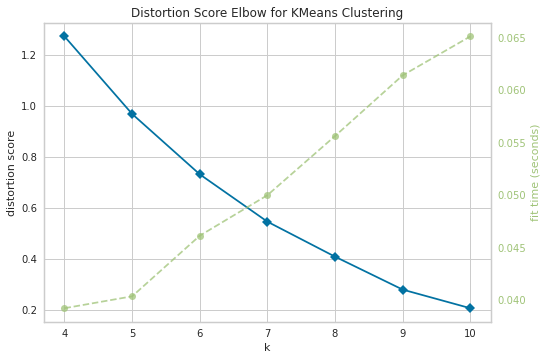

In [492]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

north_grouped_clustering = north_grouped.drop('Neighborhood', 1)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,11))

visualizer.fit(north_grouped_clustering)        # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [493]:
# set number of clusters
kclusters = 7
# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state=0).fit(north_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 0, 1, 5, 5, 0, 1, 4, 1, 4], dtype=int32)

And then we create clusters of the neighborhood using the k-means to cluster the neighborhood into 5 clusters (this was decided after checking the Elbow Method and Silhouette Coefficients).

In [494]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
north_merged = north_df
# match/merge SW London data with latitude/longitude for each neighborhood
north_merged_latlong = north_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on = 'Location')
north_merged_latlong.head()

,Location,London borough,Postcode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beckton,Newham,E6,51.53292,0.05461,4,Café,Thai Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Indian Restaurant,Sandwich Place,Caribbean Restaurant,Diner,Food Truck,Restaurant
1,Beckton,Newham,E16,51.50913,0.01528,4,Café,Thai Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Indian Restaurant,Sandwich Place,Caribbean Restaurant,Diner,Food Truck,Restaurant
2,Bethnal Green,Tower Hamlets,E2,51.52669,-0.06257,0,Café,Fast Food Restaurant,Turkish Restaurant,Sandwich Place,Falafel Restaurant,Japanese Restaurant,Mediterranean Restaurant,Pakistani Restaurant,Pizza Place,Restaurant
3,Blackwall,Tower Hamlets,E14,51.51122,-0.01264,1,Pizza Place,Indian Restaurant,Bakery,English Restaurant,Chinese Restaurant,Fried Chicken Joint,Sandwich Place,Café,Steakhouse,Breakfast Spot
4,Bow,Tower Hamlets,E3,51.52702,-0.02594,5,French Restaurant,Bakery,Breakfast Spot,Burger Joint,Sandwich Place,Chinese Restaurant,Vietnamese Restaurant,Diner,Food Truck,Fish & Chips Shop


Visualizing the Resulting Clusters 

— To visualize the clusters, we have the following:

In [495]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(north_merged_latlong['Latitude'], north_merged_latlong['Longitude'], north_merged_latlong['Location'], north_merged_latlong['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
display(map_clusters)

In [496]:
# Cluster 1
north_merged_latlong.loc[north_merged_latlong['Cluster Labels'] == 0, north_merged_latlong.columns[[1] + list(range(6, north_merged_latlong.shape[1]))]]

,London borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Tower Hamlets,Café,Fast Food Restaurant,Turkish Restaurant,Sandwich Place,Falafel Restaurant,Japanese Restaurant,Mediterranean Restaurant,Pakistani Restaurant,Pizza Place,Restaurant
6,Tower Hamlets,Café,Fast Food Restaurant,Turkish Restaurant,Sandwich Place,Falafel Restaurant,Japanese Restaurant,Mediterranean Restaurant,Pakistani Restaurant,Pizza Place,Restaurant
11,Newham,Fast Food Restaurant,Indian Restaurant,Chinese Restaurant,Turkish Restaurant,Thai Restaurant,Bakery,Sandwich Place,Café,Food Truck,Fish & Chips Shop
12,Newham,Fast Food Restaurant,Indian Restaurant,Comfort Food Restaurant,Fish & Chips Shop,Bakery,Café,Chinese Restaurant,French Restaurant,Food Truck,Falafel Restaurant
18,Newham,Fast Food Restaurant,Sandwich Place,Indian Restaurant,Café,Bakery,Doner Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant
31,Newham,Fast Food Restaurant,Sandwich Place,Indian Restaurant,Café,Bakery,Doner Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant
32,Tower Hamlets,Restaurant,Sandwich Place,Salad Place,Italian Restaurant,Café,French Restaurant,Sushi Restaurant,Asian Restaurant,Indian Restaurant,Tapas Restaurant
33,Newham,Café,Fried Chicken Joint,Fast Food Restaurant,Bakery,Middle Eastern Restaurant,Chinese Restaurant,Restaurant,Sandwich Place,Indian Restaurant,Turkish Restaurant
34,Newham,Café,Fried Chicken Joint,Fast Food Restaurant,Bakery,Middle Eastern Restaurant,Chinese Restaurant,Restaurant,Sandwich Place,Indian Restaurant,Turkish Restaurant
37,Newham,Café,Fast Food Restaurant,Sandwich Place,Bakery,Fried Chicken Joint,Middle Eastern Restaurant,Indian Restaurant,Moroccan Restaurant,Mediterranean Restaurant,Asian Restaurant


In [497]:
# Cluster 2
north_merged_latlong.loc[north_merged_latlong['Cluster Labels'] == 1, north_merged_latlong.columns[[1] + list(range(6, north_merged_latlong.shape[1]))]]

,London borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Tower Hamlets,Pizza Place,Indian Restaurant,Bakery,English Restaurant,Chinese Restaurant,Fried Chicken Joint,Sandwich Place,Café,Steakhouse,Breakfast Spot
7,Tower Hamlets,Pizza Place,Indian Restaurant,Bakery,English Restaurant,Chinese Restaurant,Fried Chicken Joint,Sandwich Place,Café,Steakhouse,Breakfast Spot
9,Tower Hamlets,Pizza Place,Indian Restaurant,Bakery,English Restaurant,Chinese Restaurant,Fried Chicken Joint,Sandwich Place,Café,Steakhouse,Breakfast Spot
13,Tower Hamlets,Pizza Place,Indian Restaurant,Bakery,English Restaurant,Chinese Restaurant,Fried Chicken Joint,Sandwich Place,Café,Steakhouse,Breakfast Spot
14,Tower Hamlets,Pizza Place,Indian Restaurant,Bakery,English Restaurant,Chinese Restaurant,Fried Chicken Joint,Sandwich Place,Café,Steakhouse,Breakfast Spot
15,Tower Hamlets,Pizza Place,Indian Restaurant,Bakery,English Restaurant,Chinese Restaurant,Fried Chicken Joint,Sandwich Place,Café,Steakhouse,Breakfast Spot
20,Tower Hamlets,Pizza Place,Indian Restaurant,Bakery,English Restaurant,Chinese Restaurant,Fried Chicken Joint,Sandwich Place,Café,Steakhouse,Breakfast Spot
24,Tower Hamlets,Pizza Place,Indian Restaurant,Bakery,English Restaurant,Chinese Restaurant,Fried Chicken Joint,Sandwich Place,Café,Steakhouse,Breakfast Spot


In [498]:
# Cluster 3
north_merged_latlong.loc[north_merged_latlong['Cluster Labels'] == 2, north_merged_latlong.columns[[1] + list(range(6, north_merged_latlong.shape[1]))]]

,London borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Redbridge,Indian Restaurant,BBQ Joint,Bakery,Seafood Restaurant,Café,Chinese Restaurant,Diner,French Restaurant,Food Truck,Fish & Chips Shop
40,Redbridge,Indian Restaurant,BBQ Joint,Bakery,Seafood Restaurant,Café,Chinese Restaurant,Diner,French Restaurant,Food Truck,Fish & Chips Shop


In [499]:
# Cluster 4
north_merged_latlong.loc[north_merged_latlong['Cluster Labels'] == 3, north_merged_latlong.columns[[1] + list(range(6, north_merged_latlong.shape[1]))]]

,London borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Tower Hamlets,Chinese Restaurant,Sandwich Place,Bakery,Portuguese Restaurant,Gastropub,Vegetarian / Vegan Restaurant,Fish & Chips Shop,Fast Food Restaurant,Food Truck,Cafeteria
25,Tower Hamlets,Chinese Restaurant,Sandwich Place,Bakery,Portuguese Restaurant,Gastropub,Vegetarian / Vegan Restaurant,Fish & Chips Shop,Fast Food Restaurant,Food Truck,Cafeteria
26,Tower Hamlets,Chinese Restaurant,Sandwich Place,Bakery,Portuguese Restaurant,Gastropub,Vegetarian / Vegan Restaurant,Fish & Chips Shop,Fast Food Restaurant,Food Truck,Cafeteria
29,Tower Hamlets,Chinese Restaurant,Sandwich Place,Bakery,Portuguese Restaurant,Gastropub,Vegetarian / Vegan Restaurant,Fish & Chips Shop,Fast Food Restaurant,Food Truck,Cafeteria
30,Tower Hamlets,Chinese Restaurant,Sandwich Place,Bakery,Portuguese Restaurant,Gastropub,Vegetarian / Vegan Restaurant,Fish & Chips Shop,Fast Food Restaurant,Food Truck,Cafeteria
36,Tower Hamlets,Chinese Restaurant,Sandwich Place,Bakery,Portuguese Restaurant,Gastropub,Vegetarian / Vegan Restaurant,Fish & Chips Shop,Fast Food Restaurant,Food Truck,Cafeteria
39,Tower Hamlets,Chinese Restaurant,Sandwich Place,Bakery,Portuguese Restaurant,Gastropub,Vegetarian / Vegan Restaurant,Fish & Chips Shop,Fast Food Restaurant,Food Truck,Cafeteria


In [500]:
# Cluster 5
north_merged_latlong.loc[north_merged_latlong['Cluster Labels'] == 4, north_merged_latlong.columns[[1] + list(range(6, north_merged_latlong.shape[1]))]]

,London borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Newham,Café,Thai Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Indian Restaurant,Sandwich Place,Caribbean Restaurant,Diner,Food Truck,Restaurant
1,Newham,Café,Thai Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Indian Restaurant,Sandwich Place,Caribbean Restaurant,Diner,Food Truck,Restaurant
8,Newham,Café,Middle Eastern Restaurant,Restaurant,Italian Restaurant,Diner,Caribbean Restaurant,Food Truck,Steakhouse,Thai Restaurant,BBQ Joint
10,Newham,Café,Middle Eastern Restaurant,Restaurant,Italian Restaurant,Diner,Caribbean Restaurant,Food Truck,Steakhouse,Thai Restaurant,BBQ Joint
21,Newham,Café,Middle Eastern Restaurant,Restaurant,Italian Restaurant,Diner,Caribbean Restaurant,Food Truck,Steakhouse,Thai Restaurant,BBQ Joint
23,Newham,Café,Fried Chicken Joint,Restaurant,Middle Eastern Restaurant,Chinese Restaurant,Food Truck,Fish & Chips Shop,Fast Food Restaurant,Falafel Restaurant,English Restaurant
27,Newham,Café,Middle Eastern Restaurant,Restaurant,Italian Restaurant,Diner,Caribbean Restaurant,Food Truck,Steakhouse,Thai Restaurant,BBQ Joint
35,Redbridge,Café,Restaurant,Italian Restaurant,Pizza Place,Bakery,Vietnamese Restaurant,English Restaurant,Mediterranean Restaurant,Diner,French Restaurant


In [501]:
# Cluster 6
north_merged_latlong.loc[north_merged_latlong['Cluster Labels'] == 5, north_merged_latlong.columns[[1] + list(range(6, north_merged_latlong.shape[1]))]]

,London borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Tower Hamlets,French Restaurant,Bakery,Breakfast Spot,Burger Joint,Sandwich Place,Chinese Restaurant,Vietnamese Restaurant,Diner,Food Truck,Fish & Chips Shop
5,Tower Hamlets,French Restaurant,Bakery,Breakfast Spot,Burger Joint,Sandwich Place,Chinese Restaurant,Vietnamese Restaurant,Diner,Food Truck,Fish & Chips Shop
22,Tower Hamlets,French Restaurant,Bakery,Breakfast Spot,Burger Joint,Sandwich Place,Chinese Restaurant,Vietnamese Restaurant,Diner,Food Truck,Fish & Chips Shop


In [502]:
# Cluster 7
north_merged_latlong.loc[north_merged_latlong['Cluster Labels'] == 6, north_merged_latlong.columns[[1] + list(range(6, north_merged_latlong.shape[1]))]]

,London borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Newham,Indian Restaurant,Asian Restaurant,Fried Chicken Joint,Restaurant,Turkish Restaurant,Argentinian Restaurant,Comfort Food Restaurant,Food Truck,Fish & Chips Shop,Fast Food Restaurant
17,Newham,Indian Restaurant,Asian Restaurant,Fried Chicken Joint,Restaurant,Turkish Restaurant,Argentinian Restaurant,Comfort Food Restaurant,Food Truck,Fish & Chips Shop,Fast Food Restaurant


## Discussion Section 

1.	Pizza Places, Cafes and Chinese Restaurants are popular in these areas of London. 

2.	As for restaurants Chinese, French are very popular in Tower Hamlets. 

3.	Asian restaurants is the 2nd most common venue in Newham. 

4.	It is surprising to see that there are many restaurants serving for example Chinese or Indian food, cuisines that are Asian, but there are few restaurants that serving all these cuisines at the same place. 

5.	Based on the results of our analysis, I would state that Newham is the best locations to open an Asian restaurant in London.

## Conclusions

In the project we have gone through the process of identifying the business problem, specifying the data required, extracting and preparing the data, performing analysis, and lastly providing recommendations to the investors/developers. During the project, we applied different data science methods and instruments to get the answer to our main question: “Where in the city of London, should the investor open an Asian Restaurant?” The findings of this project will help the relevant investor better understand the advantages of different London neighborhoods/boroughs in terms of opening an Asian restaurant. 